# Step 1: Loading the dataset

In [2]:
import pandas as pd

# Read the CSV file from the URL into a DataFrame
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
df = pd.read_csv(url)
df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


# Step 2: Study of variables and their content
In this case, we have only 3 variables: 2 predictors and a dichotomous label. Of the two predictors, we are really only interested in the comment part, since the fact of classifying a comment as positive or negative will depend on its content, not on the application from which it was written. Therefore, the `package_name` variable should be removed.

In [4]:
df = df.drop(columns="package_name", axis=1)
df

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


When we work with text as in this case, it does not make sense to do an EDA, the process is different, since the only variable we are interested in is the one that contains the text. Optionally, you can perform some minor EDA by exploring some word clouds. We can make a word cloud for each `polarity` class. 


A **word cloud**, also known as a tag cloud or text cloud, is a visualization technique used to represent text data, where the size of each word indicates its frequency or importance within the text. In a word cloud, words are typically arranged randomly or in a way that emphasizes the most significant words. 

Below we can see a word cloud for both positive and negative reviews. The word cloud for positive reviews include some positive terms like "great", "love" and "best". The word cloud for negative reviews include some negative terms like "fix", "issue" and "bug".

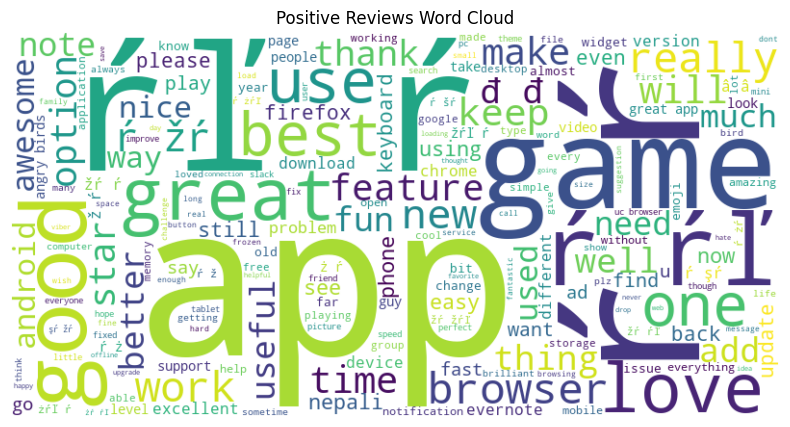

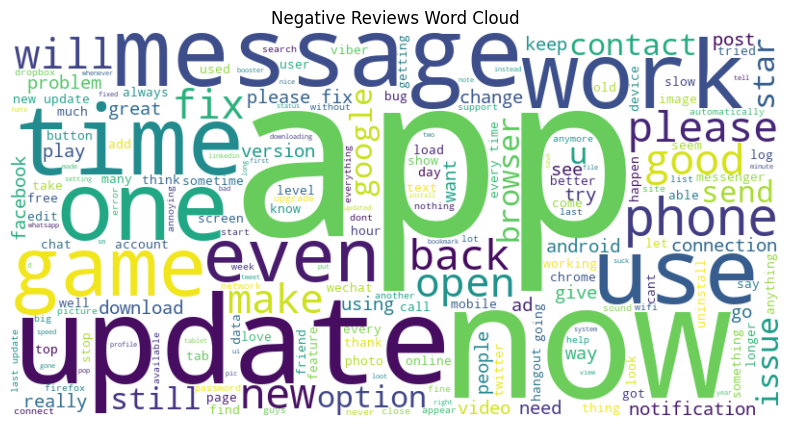

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split DataFrame into two based on polarity
positive_df = df[df['polarity'] == 1]
negative_df = df[df['polarity'] == 0]

# Preprocess the text data if necessary (e.g., remove punctuation, convert to lowercase, remove stopwords)

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each class
generate_word_cloud(positive_df['review'], 'Positive Reviews Word Cloud')
generate_word_cloud(negative_df['review'], 'Negative Reviews Word Cloud')